In [72]:
import pandas as pd

In [73]:
data = pd.read_csv ("lens-export.csv")

In [74]:
df = data[['Jurisdiction', 'Publication Date', 'Publication Year', 
'Application Date', 'Title', 'Abstract', 'Applicants', 'Owners', 
'Legal Status', 'CPC Classifications', 'Document Type']]

In [75]:
df = pd.DataFrame(df)

In [76]:
import plotly.express as px

In [77]:
country_code_mapping = {
    'AF': 'AFG', 'AL': 'ALB', 'DZ': 'DZA', 'AS': 'ASM', 'AD': 'AND', 'AO': 'AGO', 'AI': 'AIA', 'AQ': 'ATA', 'AG': 'ATG', 'AR': 'ARG',
    'AM': 'ARM', 'AW': 'ABW', 'AU': 'AUS', 'AT': 'AUT', 'AZ': 'AZE', 'BS': 'BHS', 'BH': 'BHR', 'BD': 'BGD', 'BB': 'BRB', 'BY': 'BLR',
    'BE': 'BEL', 'BZ': 'BLZ', 'BJ': 'BEN', 'BM': 'BMU', 'BT': 'BTN', 'BO': 'BOL', 'BA': 'BIH', 'BW': 'BWA', 'BR': 'BRA', 'BN': 'BRN',
    'BG': 'BGR', 'BF': 'BFA', 'BI': 'BDI', 'CV': 'CPV', 'KH': 'KHM', 'CM': 'CMR', 'CA': 'CAN', 'KY': 'CYM', 'CF': 'CAF', 'TD': 'TCD',
    'CL': 'CHL', 'CN': 'CHN', 'CO': 'COL', 'KM': 'COM', 'CG': 'COG', 'CD': 'COD', 'CR': 'CRI', 'CI': 'CIV', 'HR': 'HRV', 'CU': 'CUB',
    'CY': 'CYP', 'CZ': 'CZE', 'DK': 'DNK', 'DJ': 'DJI', 'DM': 'DMA', 'DO': 'DOM', 'EC': 'ECU', 'EG': 'EGY', 'SV': 'SLV', 'GQ': 'GNQ',
    'ER': 'ERI', 'EE': 'EST', 'SZ': 'SWZ', 'ET': 'ETH', 'FJ': 'FJI', 'FI': 'FIN', 'FR': 'FRA', 'GA': 'GAB', 'GM': 'GMB', 'GE': 'GEO',
    'DE': 'DEU', 'GH': 'GHA', 'GR': 'GRC', 'GD': 'GRD', 'GT': 'GTM', 'GN': 'GIN', 'GW': 'GNB', 'GY': 'GUY', 'HT': 'HTI', 'HN': 'HND',
    'HU': 'HUN', 'IS': 'ISL', 'IN': 'IND', 'ID': 'IDN', 'IR': 'IRN', 'IQ': 'IRQ', 'IE': 'IRL', 'IL': 'ISR', 'IT': 'ITA', 'JM': 'JAM',
    'JP': 'JPN', 'JO': 'JOR', 'KZ': 'KAZ', 'KE': 'KEN', 'KI': 'KIR', 'KP': 'PRK', 'KR': 'KOR', 'KW': 'KWT', 'KG': 'KGZ', 'LA': 'LAO',
    'LV': 'LVA', 'LB': 'LBN', 'LS': 'LSO', 'LR': 'LBR', 'LY': 'LBY', 'LI': 'LIE', 'LT': 'LTU', 'LU': 'LUX', 'MG': 'MDG', 'MW': 'MWI',
    'MY': 'MYS', 'MV': 'MDV', 'ML': 'MLI', 'MT': 'MLT', 'MH': 'MHL', 'MR': 'MRT', 'MU': 'MUS', 'MX': 'MEX', 'FM': 'FSM', 'MD': 'MDA',
    'MC': 'MCO', 'MN': 'MNG', 'ME': 'MNE', 'MA': 'MAR', 'MZ': 'MOZ', 'MM': 'MMR', 'NA': 'NAM', 'NR': 'NRU', 'NP': 'NPL', 'NL': 'NLD',
    'NZ': 'NZL', 'NI': 'NIC', 'NE': 'NER', 'NG': 'NGA', 'MK': 'MKD', 'NO': 'NOR', 'OM': 'OMN', 'PK': 'PAK', 'PW': 'PLW', 'PA': 'PAN',
    'PG': 'PNG', 'PY': 'PRY', 'PE': 'PER', 'PH': 'PHL', 'PL': 'POL', 'PT': 'PRT', 'QA': 'QAT', 'RO': 'ROU', 'RU': 'RUS', 'RW': 'RWA',
    'KN': 'KNA', 'LC': 'LCA', 'VC': 'VCT', 'WS': 'WSM', 'SM': 'SMR', 'ST': 'STP', 'SA': 'SAU', 'SN': 'SEN', 'RS': 'SRB', 'SC': 'SYC',
    'SL': 'SLE', 'SG': 'SGP', 'SK': 'SVK', 'SI': 'SVN', 'SB': 'SLB', 'SO': 'SOM', 'ZA': 'ZAF', 'ES': 'ESP', 'LK': 'LKA', 'SD': 'SDN',
    'SR': 'SUR', 'SE': 'SWE', 'CH': 'CHE', 'SY': 'SYR', 'TW': 'TWN', 'TJ': 'TJK', 'TZ': 'TZA', 'TH': 'THA', 'TL': 'TLS', 'TG': 'TGO',
    'TO': 'TON', 'TT': 'TTO', 'TN': 'TUN', 'TR': 'TUR', 'TM': 'TKM', 'TV': 'TUV', 'UG': 'UGA', 'UA': 'UKR', 'AE': 'ARE', 'GB': 'GBR',
    'US': 'USA', 'UY': 'URY', 'UZ': 'UZB', 'VU': 'VUT', 'VA': 'VAT', 'VE': 'VEN', 'VN': 'VNM', 'YE': 'YEM', 'ZM': 'ZMB', 'ZW': 'ZWE'
}

# Map the country codes to ISO-3 codes

In [79]:
df['CountryCodeISO3'] = df['Jurisdiction'].map(country_code_mapping)

# Count the occurrences of each country code

In [81]:
country_counts = df['CountryCodeISO3'].value_counts().reset_index()
country_counts.columns = ['CountryCodeISO3', 'Count']

# Visualize patent global patent distribution

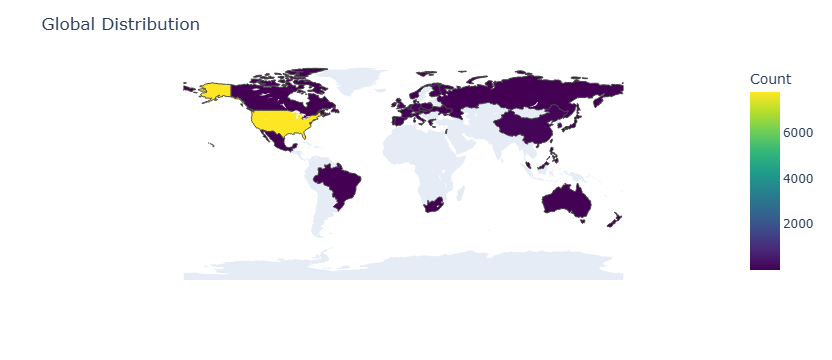

In [83]:
fig = px.choropleth(country_counts, locations='CountryCodeISO3', locationmode='ISO-3',
                    color='Count', hover_name='CountryCodeISO3',
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(
    title_text='Global Distribution',
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular')
)

fig.show()

In [84]:
import plotly.graph_objects as go
import random

# Technology Convergence using Sankey Diagram

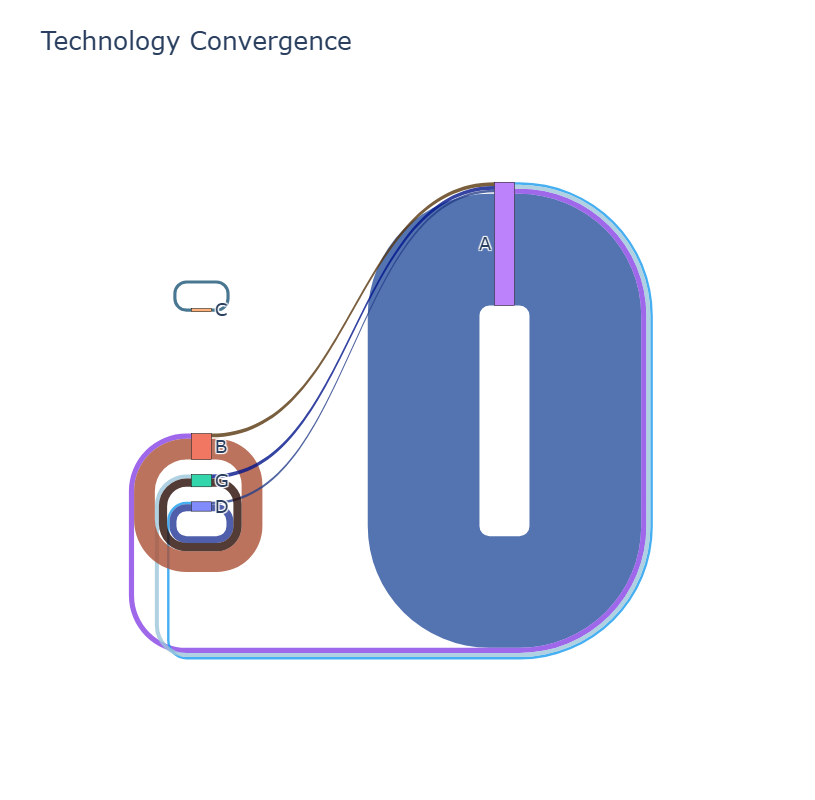

In [86]:
flows = []
for classes in df["CPC Classifications"]:
    if isinstance(classes, str):  
        class_list = classes.split(";;")  
        if len(class_list) > 1:  
            for i in range(len(class_list) - 1):
                
                main_class_source = class_list[i][0]  
                main_class_target = class_list[i + 1][0]  
                flows.append((main_class_source, main_class_target))  


flow_counts = pd.DataFrame(flows, columns=["Source", "Target"])
flow_counts["Count"] = 1
flow_counts = flow_counts.groupby(["Source", "Target"]).sum().reset_index()


filtered_flow_counts = flow_counts[flow_counts["Count"] >= 3000]


sources = filtered_flow_counts["Source"].tolist()
targets = filtered_flow_counts["Target"].tolist()
counts = filtered_flow_counts["Count"].tolist()


nodes = list(set(sources + targets))
node_indices = {node: idx for idx, node in enumerate(nodes)}


source_indices = [node_indices[source] for source in sources]
target_indices = [node_indices[target] for target in targets]


link_colors = ['rgba({}, {}, {}, 0.8)'.format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(counts))]
link_labels = [f"{count}" for count in counts]


fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,  
    ),
    link=dict(
        source=source_indices,  
        target=target_indices,  
        value=counts,  
        color=link_colors,  
        customdata=link_labels,  
        hovertemplate='Value: %{value}<br>Label: %{customdata}<extra></extra>' 
    )
))


fig.update_layout(title_text="Technology Convergence", font_size=18, width=700, height=800)  

fig.show()

# Visualize legal Status

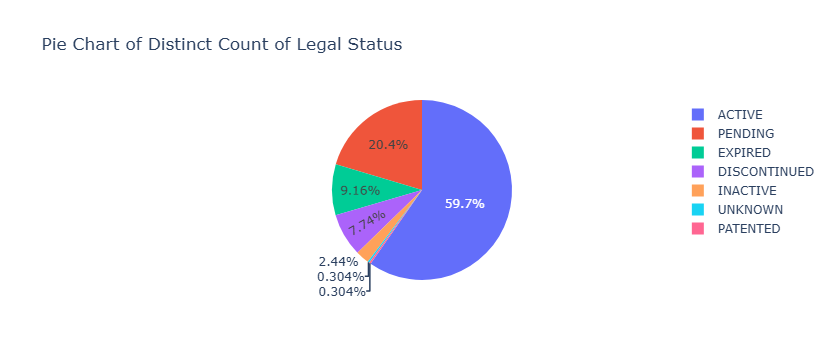

In [88]:
distinct_count = df['Legal Status'].value_counts().reset_index()
distinct_count.columns = ['Legal Status', 'Count']


fig = px.pie(distinct_count, values='Count', names='Legal Status', title='Pie Chart of Distinct Count of Legal Status')


fig.show()

# Visualize Patent Activity

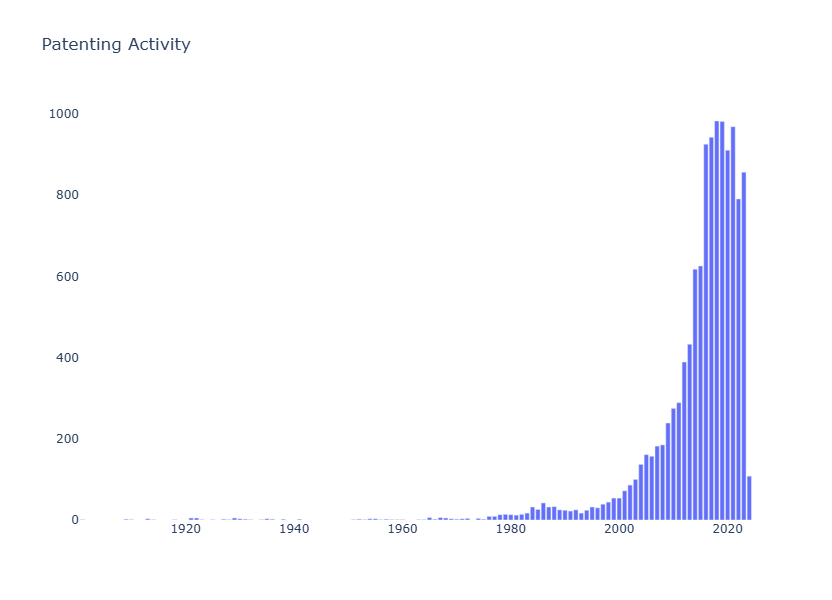

In [90]:
top_applicants = df['Publication Year'].value_counts().reset_index()
top_applicants.columns = ['Publication Year', 'Count']


fig = px.bar(top_applicants, x='Publication Year', y='Count', title='Patenting Activity', width=800, height=600)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    xaxis_title=None,
    yaxis_title=None
)

fig.show()

# Legal Status over the years

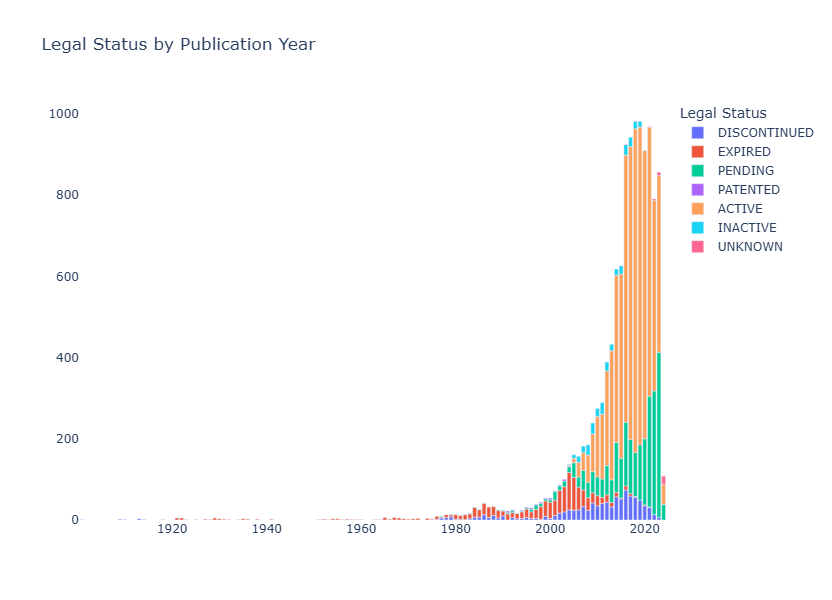

In [92]:
distinct_count = df.groupby(['Publication Year', 'Legal Status']).size().reset_index(name='Count')

fig = px.bar(distinct_count, x='Publication Year', y='Count', color='Legal Status', 
             title='Legal Status by Publication Year', height = 600, width = 800)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    xaxis_title=None,
    yaxis_title=None
)

fig.show()

# Harmonise top names and visualize top 10 applicants

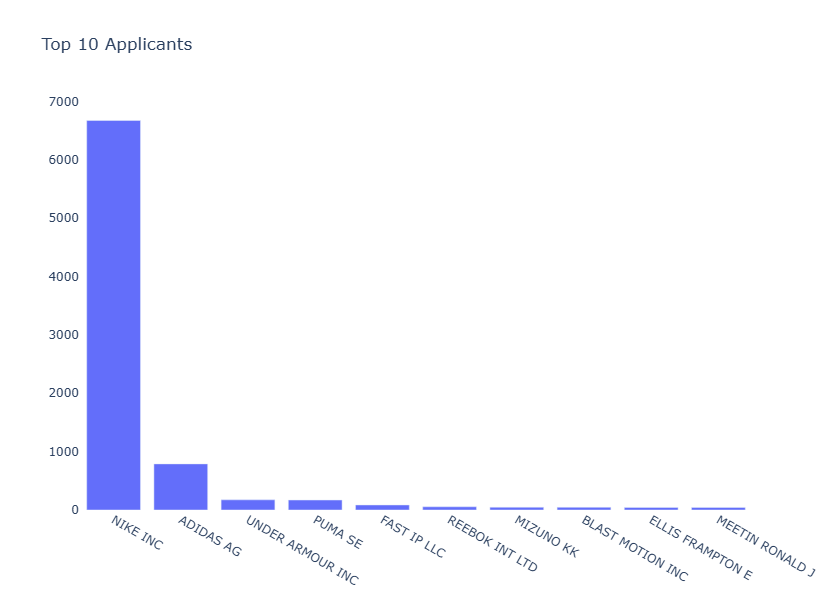

In [94]:
df['Applicants'] = df['Applicants'].apply(lambda x: 'NIKE INC' if isinstance(x, str) and 'NIKE' in x else x)
df['Applicants'] = df['Applicants'].apply(lambda x: 'ADIDAS AG' if isinstance(x, str) and 'ADIDAS' in x else x)
df['Applicants'] = df['Applicants'].apply(lambda x: 'PUMA SE' if isinstance(x, str) and 'PUMA' in x else x)
df['Applicants'] = df['Applicants'].apply(lambda x: 'REEBOK INT LTD' if isinstance(x, str) and 'REEBOK' in x else x)

top_applicants = df['Applicants'].value_counts().nlargest(10).reset_index()
top_applicants.columns = ['Applicants', 'Count']

fig = px.bar(top_applicants, x='Applicants', y='Count', title='Top 10 Applicants', width=800, height=600)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    xaxis_title=None,
    yaxis_title=None
)

fig.show()